In [25]:
#Library Imports
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import datetime
import random

from sklearn.metrics import mean_absolute_error
import sklearn
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold

In [58]:
# Set Random Seed
seed = 777
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
random.seed(seed)

In [8]:
train=pd.read_csv('./power_data/11th_data/train.csv')
test=pd.read_csv('./power_data/11th_data/test.csv')
submission=pd.read_csv('./power_data/11th_data/submission.csv')

In [9]:
#train.shape 122400 X 10
#60개의 건물 X 85일 24시간 =122400
train

,Time,NX1,NX2,NX3,NX4,NX5,NX6,NX7,NX8,NX9,...,NX1291,NX1292,NX1293,NX1294,NX1295,NX1296,NX1297,NX1298,NX1299,NX1300
0,2016-07-26 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-26 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-26 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-26 14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-26 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16904,2018-06-30 19:00,0.271,0.754,0.327,0.468,NaN,0.314,0.769,0.790,0.558,...,0.523,0.455,0.295,0.056,0.295,2.089,0.619,1.063,0.345,0.565
16905,2018-06-30 20:00,0.341,0.827,0.478,0.356,NaN,0.434,0.680,0.819,0.470,...,0.350,0.799,0.287,0.057,0.548,2.168,0.723,4.760,0.388,0.620
16906,2018-06-30 21:00,0.535,0.516,0.558,0.496,NaN,0.479,0.590,0.910,0.424,...,0.446,0.754,0.433,0.060,0.677,2.028,0.766,5.386,0.440,0.573
16907,2018-06-30 22:00,0.379,0.494,0.605,0.320,NaN,0.555,0.604,1.044,0.412,...,0.567,0.504,0.384,0.210,1.019,1.055,0.735,7.150,0.393,0.629


In [17]:
#test.shape 10080 X 9
#60개의 건물 X 7일 24시간 =10080
test

,Time,NX1301,NX1302,NX1303,NX1304,NX1305,NX1306,NX1307,NX1308,NX1309,...,NX1491,NX1492,NX1493,NX1494,NX1495,NX1496,NX1497,NX1498,NX1499,NX1500
0,2017.7.1 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275,0.021,NaN
1,2017.7.1 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.021,NaN
2,2017.7.1 2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237,0.021,NaN
3,2017.7.1 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229,0.020,NaN
4,2017.7.1 4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202,0.021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018.6.30 19:00,1.255,0.175,0.430,0.429,0.169,0.739,0.573,0.341,0.127,...,0.312,0.381,0.479,0.858,11.546,0.428,0.134,3.519,0.027,0.286
8756,2018.6.30 20:00,1.596,1.692,0.332,0.366,0.159,0.255,0.501,0.281,0.126,...,0.327,0.402,0.725,0.816,11.591,0.413,0.206,3.331,0.027,0.303
8757,2018.6.30 21:00,1.379,0.883,0.435,0.497,0.166,0.233,0.634,0.401,0.439,...,0.253,0.401,0.426,0.659,10.766,0.466,0.324,3.416,0.026,0.253
8758,2018.6.30 22:00,1.000,0.539,0.268,0.459,0.463,0.454,0.676,0.543,0.737,...,0.332,0.401,0.353,0.462,0.312,0.473,0.402,4.263,0.027,0.253


In [59]:
def sort_dataset(dataset):
    '''
    This function sorts the meteric_id of train.csv and test.csv into numerical order.
    '''
    columns = dataset.columns
    # 맨처음 칼럼은 time이므로 1:부터 받아오기
    meter_ids = columns[1:]
    tmp = []
    for meter_id in meter_ids:
        meter_id = meter_id.replace('NX', '')
        tmp.append(int(meter_id)) 
    # 받아온 meter_id 정렬해서 tmp에 넣어주기    
    tmp = np.sort(tmp)
    
    # meter_ids앞에 X 넣고 합쳐서 리스트 만들기
    meter_ids = []
    for meter_id in tmp:
        meter_id = 'X' + str(meter_id)
        meter_ids.append(meter_id)

    # results에는 시간이 들어감
    results = [dataset[columns[0]].values]
    for meter_id in meter_ids:
        values = dataset[meter_id].values
        results.append(values)
    # .T 를 사용하여 행렬 전치하기 (행과 열 바꿔주기)
    results = np.array(results).T
    df = pd.DataFrame(results, columns=[columns[0]] + meter_ids)
    return df

In [60]:
# Weather data
with open('power_data/인천_시간별__기상자료(16-18)_축소__7월1일.csv') as file:
    additional = []
    for line in file.readlines():
        line = line.replace(',\n', ',nan')
        line = line.replace('\n', '')
        line = line.replace('뇌우끝,비', '뇌우끝_비')
        line = line.replace('뇌우,비눈', '뇌우_비눈')
        line = line.replace('뇌우끝,눈', '뇌우끝_눈')
        line = line.replace(',,', ',nan,')
        line = line.replace(',,', ',nan,')
        additional.append(line.split(','))
additional = np.array(additional)
# 칼럼명은 0번째에 있으니 인덱스 0으로 받아넣기
additional_columns = additional[0]
# 데이터는 그 다음 인덱스 부터 받기
additional_datas = additional[1:]
# float리스트 만들어서 값이 숫자라면 실수로 바꾸고, 문자와 함께 있다면 문자로 바꿔주고 넣어줌
additional_datas_float = []
for i in range(len(additional_columns)):
    additional_data = additional_datas[:, i]
    try:
        tmp = additional_data.astype(float)
        additional_datas_float.append(tmp)
    except:
        tmp = additional_data.astype(str)
        additional_datas_float.append(tmp)

In [82]:
additional_datas_float

[array([112., 112., 112., ..., 112., 112., 112.]),
 array(['2016.7.20 0:00', '2016.7.20 1:00', '2016.7.20 2:00', ...,
        '2018.7.1 21:00', '2018.7.1 22:00', '2018.7.1 23:00'], dtype='<U16'),
 array([25.7, 25.6, 25.4, ..., 21.3, 21.3, 21.2]),
 array([0. , 0. , 0. , ..., 4.2, 6.2, 4.6]),
 array([1.3, 1.4, 0.3, ..., 4.5, 4.8, 4.1]),
 array([98., 98., 98., ..., 98., 98., 98.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array(['박무', 'nan', 'nan', ..., '보통비계속', '보통비계속', '보통비계속'], dtype='<U16'),
 array([ 8.,  8.,  8., ..., 10., 10., 10.])]

In [61]:
# additional_datas_float[1]에는 시간값이 들어있음.
# 시간값 받아서 형식을 datetime에 맞춰 바꿔주기
add_times = []
for item in additional_datas_float[1]:
    new_time = datetime.datetime.strptime(item, '%Y.%m.%d %H:%M')
    add_times.append(new_time)
add_times = np.array(add_times)

# additional_datas_float[2]에는 온도값이 들어있음. 결측값에는 전날 온도 넣어주기
temperature = additional_datas_float[2]
for i in range(len(temperature)):
    if np.isnan(temperature[i]):
        temperature[i] = temperature[i-1]        

# additional_datas_float[3]에는 강우량값이 들어있음. 결측값에는 0으로 넣어주기
rainfall = additional_datas_float[3]
rainfall[np.where(np.isnan(rainfall) == True)[0]] = 0

# additional_datas_float[4]에는 풍량값이 들어있음.
wind = additional_datas_float[4]

# additional_datas_float[5]에는 습도값이 들어있음. 결측값에는 전날 습도 넣어주기
humidity = additional_datas_float[5]
for i in range(len(humidity)):
    if np.isnan(humidity[i]):
        humidity[i] = humidity[i-1]

# additional_datas_float[6]에는 강설량값이 들어있음. 결측값에는 0으로 넣어주기
snowfall = additional_datas_float[6]
snowfall[np.where(np.isnan(snowfall) == True)[0]] = 0

# additional_datas_float[8]에는 구름값이 들어있음. 결측값에는 전날 구름 넣어주기
cloud = additional_datas_float[8]
for i in range(len(cloud)):
    if np.isnan(cloud[i]):
        cloud[i] = cloud[i-1]

# **데이터 전처리**
1) train, test의 결측치를 모두 0으로 변경합니다.

2) 날짜의 타입을 datetime 으로 변경합니다.

3) 시간별 날씨 데이터를 평균을 이용하여 일자별 날씨로 변경합니다.

In [62]:
# 시간 형식 바꿔주기
def time_convert(df_time, string_type='train'):
    '''
    This function changes format of time from string to datetime.
    '''
    old_times = df_time
    new_times = old_times.copy()
    
    # new_times에 old_times값들 연월일시분으로 형변환해서 넣기
    for i, old_time in enumerate(old_times):
        if string_type == 'train':
            new_time = datetime.datetime.strptime(old_time, '%Y-%m-%d %H:%M')
        elif string_type == 'test':
            new_time = datetime.datetime.strptime(old_time, '%Y.%m.%d %H:%M')
        else:
            new_time = datetime.datetime.strptime(old_time, '%Y-%m-%d')
        new_times[i] = new_time
    return new_times

# Day 데이터 시간과 날짜로 나누기
def split_day(_times, _datas):
    '''
    This function splits power consumption data and weather data by days.
    '''
    for time in _times:
        if time.time().hour == 0:
            ref_time = time.date()
            break 
    times = []
    datas = []
    data_tmp = []
    for i, time in enumerate(_times):
        time = time.date()
        data = _datas[i]
        if ref_time > time:
            pass
        elif ref_time == time:
            data_tmp.append(data)
        else:
            times.append(ref_time)
            datas.append(data_tmp)
            ref_time = time
            data_tmp = [data]
            
    if ref_time not in times:
        if len(data_tmp) == 24:
            times.append(ref_time)
            datas.append(data_tmp)
    times = np.array(times)
    datas = np.array(datas)
    return times, datas

In [63]:
# Repalce nan to zero
train = train.replace(np.nan, 0.0)
test = test.replace(np.nan, 0.0)

In [64]:
train

,Time,NX1,NX2,NX3,NX4,NX5,NX6,NX7,NX8,NX9,...,NX1291,NX1292,NX1293,NX1294,NX1295,NX1296,NX1297,NX1298,NX1299,NX1300
0,2016-07-26 11:00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,2016-07-26 12:00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,2016-07-26 13:00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,2016-07-26 14:00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2016-07-26 15:00,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16904,2018-06-30 19:00,0.271,0.754,0.327,0.468,0.0,0.314,0.769,0.790,0.558,...,0.523,0.455,0.295,0.056,0.295,2.089,0.619,1.063,0.345,0.565
16905,2018-06-30 20:00,0.341,0.827,0.478,0.356,0.0,0.434,0.680,0.819,0.470,...,0.350,0.799,0.287,0.057,0.548,2.168,0.723,4.760,0.388,0.620
16906,2018-06-30 21:00,0.535,0.516,0.558,0.496,0.0,0.479,0.590,0.910,0.424,...,0.446,0.754,0.433,0.060,0.677,2.028,0.766,5.386,0.440,0.573
16907,2018-06-30 22:00,0.379,0.494,0.605,0.320,0.0,0.555,0.604,1.044,0.412,...,0.567,0.504,0.384,0.210,1.019,1.055,0.735,7.150,0.393,0.629


In [65]:
test

,Time,NX1301,NX1302,NX1303,NX1304,NX1305,NX1306,NX1307,NX1308,NX1309,...,NX1491,NX1492,NX1493,NX1494,NX1495,NX1496,NX1497,NX1498,NX1499,NX1500
0,2017.7.1 0:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.275,0.021,0.000
1,2017.7.1 1:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.222,0.021,0.000
2,2017.7.1 2:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.237,0.021,0.000
3,2017.7.1 3:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.229,0.020,0.000
4,2017.7.1 4:00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.202,0.021,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018.6.30 19:00,1.255,0.175,0.430,0.429,0.169,0.739,0.573,0.341,0.127,...,0.312,0.381,0.479,0.858,11.546,0.428,0.134,3.519,0.027,0.286
8756,2018.6.30 20:00,1.596,1.692,0.332,0.366,0.159,0.255,0.501,0.281,0.126,...,0.327,0.402,0.725,0.816,11.591,0.413,0.206,3.331,0.027,0.303
8757,2018.6.30 21:00,1.379,0.883,0.435,0.497,0.166,0.233,0.634,0.401,0.439,...,0.253,0.401,0.426,0.659,10.766,0.466,0.324,3.416,0.026,0.253
8758,2018.6.30 22:00,1.000,0.539,0.268,0.459,0.463,0.454,0.676,0.543,0.737,...,0.332,0.401,0.353,0.462,0.312,0.473,0.402,4.263,0.027,0.253


In [66]:
# Convert time data format to datetime
train_times = time_convert(train['Time'], string_type='train').values
test_times = time_convert(test['Time'], string_type='test').values

In [67]:
train_times

array([datetime.datetime(2016, 7, 26, 11, 0),
       datetime.datetime(2016, 7, 26, 12, 0),
       datetime.datetime(2016, 7, 26, 13, 0), ...,
       datetime.datetime(2018, 6, 30, 21, 0),
       datetime.datetime(2018, 6, 30, 22, 0),
       datetime.datetime(2018, 6, 30, 23, 0)], dtype=object)

In [68]:
test_times

array([datetime.datetime(2017, 7, 1, 0, 0),
       datetime.datetime(2017, 7, 1, 1, 0),
       datetime.datetime(2017, 7, 1, 2, 0), ...,
       datetime.datetime(2018, 6, 30, 21, 0),
       datetime.datetime(2018, 6, 30, 22, 0),
       datetime.datetime(2018, 6, 30, 23, 0)], dtype=object)

In [69]:
# Meter id
train_meter_ids = train.columns[1:]
test_meter_ids = test.columns[1:]

In [70]:
train_meter_ids

Index(['NX1', 'NX2', 'NX3', 'NX4', 'NX5', 'NX6', 'NX7', 'NX8', 'NX9', 'NX10',
       ...
       'NX1291', 'NX1292', 'NX1293', 'NX1294', 'NX1295', 'NX1296', 'NX1297',
       'NX1298', 'NX1299', 'NX1300'],
      dtype='object', length=1300)

In [71]:
test_meter_ids

Index(['NX1301', 'NX1302', 'NX1303', 'NX1304', 'NX1305', 'NX1306', 'NX1307',
       'NX1308', 'NX1309', 'NX1310',
       ...
       'NX1491', 'NX1492', 'NX1493', 'NX1494', 'NX1495', 'NX1496', 'NX1497',
       'NX1498', 'NX1499', 'NX1500'],
      dtype='object', length=200)

In [72]:
# Downsampling (a day)
temperature = np.mean(split_day(add_times, temperature)[1], axis=1)
rainfall = np.mean(split_day(add_times, rainfall)[1], axis=1)
wind = np.mean(split_day(add_times, wind)[1], axis=1)
humidity = np.mean(split_day(add_times, humidity)[1], axis=1)
snowfall = np.mean(split_day(add_times, snowfall)[1], axis=1)
add_times, cloud = split_day(add_times, cloud)
cloud = np.mean(cloud, axis=1)

In [73]:
# Make additional data set
additional_data = np.array([   
    add_times,
    temperature,
    rainfall,
    wind,
    humidity,
    snowfall,
    cloud,    
])

In [74]:
additional_data

array([[datetime.date(2016, 7, 20), datetime.date(2016, 7, 21),
        datetime.date(2016, 7, 22), ..., datetime.date(2018, 6, 29),
        datetime.date(2018, 6, 30), datetime.date(2018, 7, 1)],
       [27.8875, 27.94583333333333, 28.4375, ..., 22.4375,
        23.708333333333332, 22.125],
       [0.0, 0.0, 0.0, ..., 0.016666666666666666, 0.0, 2.466666666666667],
       ...,
       [90.58333333333333, 86.54166666666667, 89.25, ...,
        90.20833333333333, 84.91666666666667, 94.29166666666667],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [6.708333333333333, 8.0, 4.708333333333333, ...,
        7.791666666666667, 9.375, 9.791666666666666]], dtype=object)

## EDA
아래 그림은 train.csv, test.csv 내 유효한 데이터 수를 보여줍니다. test.csv는 id 481번 이하로 분포하고 있으며 481번을 기준으로 데이터 수의 분포가 다릅니다. 따라서 모델 생성 시 0 ~ 481번 데이터만 사용하는 것을 고려합니다.

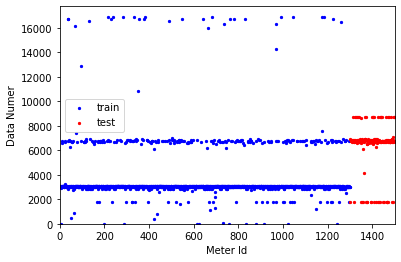

In [78]:
# train 처리
train_id_num = []
train_data_num = []

for meter_id in train_meter_ids:
    meter_num = int(meter_id.replace('NX', ''))
    valid_num = len(np.where(train[meter_id] > 0.0)[0])
    train_id_num.append(meter_num)
    train_data_num.append(valid_num)

# test 처리
test_id_num = []
test_data_num = [] 

for meter_id in test_meter_ids:
    meter_num = int(meter_id.replace('NX', ''))
    valid_num = len(np.where(test[meter_id] > 0.0)[0])
    test_id_num.append(meter_num)
    test_data_num.append(valid_num)
    
# 그래프 그리기
plt.scatter(train_id_num, train_data_num, s=5, color='b', label='train')
plt.scatter(test_id_num, test_data_num, s=5, color='r', label='test')
plt.legend(loc=0)
plt.xlim(0, 1500)
plt.ylim(bottom=0)
plt.xlabel('Meter Id')
plt.ylabel('Data Numer')
plt.show()

## Feature Engineering & Initial Modeling
1) 전력 데이터를 meter id 별로 따로 처리합니다.

2) 전력 데이터는 0.001 단위로 측정되어 있습니다. 너무 작은 측정값은 노이즈가 될 수 있어 0.003 보다 작은 값을 0 으로 변경합니다.

3) 전력 데이터를 다음 방법으로 정규화하여 사용합니다. (최댓값으로 나눔 > 로그를 씌움 > 평균으로 뺌 > 표준편차로 나눔)

4) 전력 데이터에 로그를 씌우기 위해 값 0을 처리합니다. (함수 consumption의 missing_value argument)

5) 전력 데이터에 해당하는 시간을 주기가 365일인 sine 함수를 이용해 인코딩하여 사용합니다. (함수 time_encoder)

6) 전력 데이터에 해당하는 요일을 Feature로 사용합니다. (월=0/6, 화=1/6, 수=2/6, 목=3/6, 금=4/6, 토=5/6, 일=6/6)

7) 2018.7.1일을 예측하는 모델은 날씨 데이터 사용을 고려합니다.

In [ ]:
def consumption(_times, _datas, missing_value=None, cutoff=12):
    '''
    a) This function returns valid power consumption by days. 
    b) It turns values which are lower than 0.003 into zero.
    '''
    times, datas = split_day(_times, _datas)
    datas[np.where(datas &lt; 3e-3)] = 0.0
    tmp = []
    for data in datas:
        if len(np.where(data &gt; 0.0)[0]) &gt;= cutoff:
            out = 24*np.mean(data[np.where(data &gt; 0.0)])
            tmp.append(out)
        else:
            tmp.append(0.0)
    datas = np.array(tmp)
    
    valid_num = len(np.where(datas &gt; 0.0)[0])
    if valid_num == 0:
        return np.array([]), np.array([])
    else:
        index_i, index_f = np.where(datas &gt; 0.0)[0][0], np.where(datas &gt; 0.0)[0][-1]
        times = times[index_i:index_f+1]
        datas = datas[index_i:index_f+1]
        if type(missing_value) == type(None):
            return times, datas
        elif missing_value == 0:
            return times, datas
        elif missing_value == 1:
            for i, data in enumerate(datas):
                if data == 0.0:
                    if i &lt; 2:
                        datas[i] = datas[i-1]
                    else:
                        datas[i] = 0.2*datas[i-2] + 0.8*datas[i-1]
            return times, datas
        elif missing_value == 2:
            mean = np.mean(datas[np.where(datas &gt; 0.0)])
            datas[np.where(datas == 0.0)] = mean
            return times, datas
        elif missing_value == 3:
            mean = gauss_mean(datas[np.where(datas &gt; 0.0)])
            datas[np.where(datas == 0.0)] = mean
            return times, datas
        else:
            print('missing_value should be in [0, 1, 2, 3]')
            raise ValueError

def distribution_in_day(_times, _datas, set_weekday=6, start=(2018, 3, 1), cutoff=12):
    '''
    This function returns power consumption distribution in a day.
    '''    
    start_year, start_month, start_day = start
    times, datas = split_day(_times, _datas)
    dist = []
    for i, data in enumerate(datas):
        if times[i] &gt;= datetime.date(start_year, start_month, start_day):
            if times[i].weekday() == set_weekday:
                if len(np.where(data &gt; 0.0)[0]) &gt;= cutoff:             
                    data = data/np.sum(data)
                    dist.append(data)
    dist = np.array(dist)
    dist = gauss_mean(dist, axis=0)
    dist = dist/np.sum(dist)
    return dist

In [ ]:
def sequence_id(
    size, times, consums, use_weekdays=False, 
    use_times=False, add_data_sets=None, reverse=False):
    '''
    This function makes a sequence for input of a model.
    '''   
    use_additional = False
    if type(add_data_sets) != type(None):
        use_additional = True
        add_times = add_data_sets[0]
        add_data_sets = add_data_sets[1:]
    if reverse:
        times = times[::-1]
        consums = consums[::-1]
        if use_additional:
            add_times = add_times[::-1]
            add_data_sets = add_data_sets[:, ::-1]    
    if use_additional:
        ix = np.where(add_times==times[0])[0].item()

    i = 0
    sequence = []
    while True:
        times_select = times[i:i+size]
        consums_select = consums[i:i+size]
        if len(consums_select) == size:
            length = len(times_select)
            select = []
            if use_additional:
                for add_data_set in add_data_sets:
                    select.append(add_data_set[i+ix:i+ix+length])
            if use_times:
                time_encoded = []
                for time in times_select:                
                    time = time_encoder(time)
                    time_encoded.append(time)
                select.append(time_encoded)
            if use_weekdays:
                weekdays = []
                for time in times_select:
                    weekday = time.weekday()   
                    weekday /= 6
                    weekdays.append(weekday)
                select.append(weekdays)
            select.append(consums_select)

            seq = np.dstack(select)
            seq = seq.flatten()
            sequence.append(seq)
            i += 1
        else:
            sequence = np.array(sequence)
            break
    return sequence

In [ ]:
def sequence_prediction(
    iteration, size, model, times, consums, 
    use_weekdays=False, use_times=False, add_data_sets=None, reverse=False):
    '''
    This function is for prediction (iteratable).
    '''
    use_additional = False
    if type(add_data_sets) != type(None):
        use_additional = True
        add_times = add_data_sets[0]
        add_data_sets = add_data_sets[1:]
    if reverse:
        times = times[::-1]
        consums = consums[::-1]
        if use_additional:
            add_times = add_times[::-1]
            add_data_sets = add_data_sets[:, ::-1]

    len_ini = len(times)
    times_pred = times.copy()
    consums_pred = consums.copy()
    for _ in range(iteration):
        times_select = times_pred[-(size-1):]
        if reverse:
            times_select = np.append(times_select, times_select[-1] + datetime.timedelta(days=-1))
        else:
            times_select = np.append(times_select, times_select[-1] + datetime.timedelta(days=1))
        consums_select = consums_pred[-(size-1):]
        consums_select = np.append(consums_select, 0.0)
        length = len(times_select)

        select = []
        if use_additional:
            ix = np.where(add_times==times_select[0])[0].item()
            for add_data_set in add_data_sets:
                select.append(add_data_set[ix:ix+length])
        if use_times:
            time_encoded = []
            for time in times_select:                
                time = time_encoder(time)
                time_encoded.append(time)
            select.append(time_encoded)
        if use_weekdays:
            weekdays = []
            for time in times_select:
                weekday = time.weekday()    
                weekday /= 6            
                weekdays.append(weekday)
            select.append(weekdays)
        select.append(consums_select)

        seq = np.dstack(select)
        seq = seq.flatten()[:-1]
        x_pred = seq.reshape(1, len(seq))
        y_pred = model.predict(x_pred)

        times_pred = np.append(times_pred, times_select[-1])
        consums_pred = np.append(consums_pred, y_pred)        
    times_pred = times_pred[len_ini:]
    consums_pred = consums_pred[len_ini:]
    return times_pred, consums_pred


In [ ]:
def normalization(datas):
    '''
    The input is subtracted by its mean value and than divided by its standard deviation.
    '''
    mean = np.mean(datas)
    std = np.std(datas)
    norm = (datas - mean) / std
    return norm, mean, std

def gauss_mean(output, axis=0):
    '''
    This function returns gaussian weighted mean value of the input.
    '''    
    if output.shape[axis] &lt;= 1:
        return np.mean(output, axis=axis)
    else:
        std = np.std(output, axis=axis)
        mean = np.mean(output, axis=axis)    
        gauss = 1/(std*np.sqrt(2*np.pi))*np.exp(-0.5 * np.square((output-mean)/std))    
        gauss_mean = np.sum(gauss*output, axis=axis)/np.sum(gauss, axis=axis)
        return gauss_mean
    
def time_encoder(time):
    '''
    This function encodes time data into a number using sine wave function (period = 365 days).
    '''
    dt = time - datetime.date(2018, 8, 1)
    dt = dt.days
    output = np.cos(2*np.pi*dt/365)
    return output

def smape(array_1, array_2):
    '''
    This function calculates SMAPE between two lists.
    '''
    score = 100*np.mean(2*abs(array_1 - array_2)/(abs(array_1)+abs(array_2)))
    return score

def r2_score(list_1, list_2):
    '''
    This function calculates R2 score between two lists.
    '''
    score = np.square(np.corrcoef(list_1, list_2)[0][1])
    return score

In [ ]:
def lgb_train(x_train, x_valid, y_train, y_valid, feature_name=None, plot=False):
    '''
    This function returns a trained LightGBM model.
    '''
    lgb_train = lgb.Dataset(x_train, label = y_train)
    lgb_valid = lgb.Dataset(x_valid, label = y_valid)    
    params = {
        'random_seed': seed,
        'bagging_seed': seed,
        'feature_fraction_seed': seed,
        'data_random_seed': seed,
        'drop_seed': seed,
        
        'boosting_type': 'gbdt',
        'objective': 'huber',
        'learning_rate': 0.04,
        'num_leaves': 63,
        'max_depth': -1,
        'bagging_fraction': 0.1,
        'feature_fraction': 0.4,
        'lambda_l1': 10.0,
        'lambda_l2': 30.0,
        'max_bin': 255,
    }    
    model = lgb.train(
        params, 
        lgb_train, 
        valid_sets = lgb_valid,
        num_boost_round = 2000,
        early_stopping_rounds = 100,
        verbose_eval = 200,
        feature_name = feature_name,
    )
    if type(feature_name) != type(None):
        lgb.plot_importance(model, figsize=(5, len(feature_name)//5))
        plt.show()
    if plot:
        true = y_valid
        pred = model.predict(x_valid)
        score = r2_score(true, pred)
        plt.title('R2: %f'%(score))
        plt.scatter(true, pred)
        plt.plot([true.min(), true.max()], [true.min(), true.max()], color='k')
        plt.show()
    return model

# **모델링**

In [31]:
train_x=train.drop('전력사용량(kWh)', axis=1)
train_y=train[['전력사용량(kWh)']]

In [32]:
train_x.drop('date_time', axis=1, inplace=True)
test.drop('date_time', axis=1, inplace=True)

In [33]:
cross=KFold(n_splits=5, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in cross.split(train_x, train_y):
    folds.append((train_idx, valid_idx))

아래 코드는 최정명님의 코드 구성 방식을 살며시 활용했습니다. 감사합니다

https://www.dacon.io/competitions/official/235713/codeshare/2476?page=1&dtype=recent


In [34]:
models={}
for fold in range(5):
    print(f'===================={fold+1}=======================')
    train_idx, valid_idx=folds[fold]
    X_train=train_x.iloc[train_idx, :]
    y_train=train_y.iloc[train_idx, :]
    X_valid=train_x.iloc[valid_idx, :]
    y_valid=train_y.iloc[valid_idx, :]
    
    model=LGBMRegressor(n_estimators=100)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], 
             early_stopping_rounds=30, verbose=100)
    models[fold]=model
    
    print(f'================================================\n\n')

====================1=======================
Training until validation scores don't improve for 30 rounds
[100]	training's l2: 110589	valid_1's l2: 110225
Did not meet early stopping. Best iteration is:
[100]	training's l2: 110589	valid_1's l2: 110225


====================2=======================
Training until validation scores don't improve for 30 rounds
[100]	training's l2: 105803	valid_1's l2: 118195
Did not meet early stopping. Best iteration is:
[100]	training's l2: 105803	valid_1's l2: 118195


====================3=======================
Training until validation scores don't improve for 30 rounds
[100]	training's l2: 110710	valid_1's l2: 110163
Did not meet early stopping. Best iteration is:
[100]	training's l2: 110710	valid_1's l2: 110163


====================4=======================
Training until validation scores don't improve for 30 rounds
[100]	training's l2: 110637	valid_1's l2: 112547
Did not meet early stopping. Best iteration is:
[100]	training's l2: 110637	valid_1

In [35]:
for i in range(5):
    submission['answer'] += models[i].predict(test)/5 

In [36]:
submission

,num_date_time,answer
0,1 2020-08-25 00,8498.811895
1,1 2020-08-25 01,8250.686717
2,1 2020-08-25 02,8233.221080
3,1 2020-08-25 03,8475.304267
4,1 2020-08-25 04,8229.168616
...,...,...
10075,60 2020-08-31 19,3132.833178
10076,60 2020-08-31 20,2717.140679
10077,60 2020-08-31 21,2987.995728
10078,60 2020-08-31 22,2528.727359


In [37]:
#제출
submission.to_csv('baseline_submission3.csv', index=False)